In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv("DTdata.csv")

x = ds.iloc[:, 3:4].values
y = ds.iloc[:, 0].values

x

array([['normal'],
       ['normal'],
       ['high'],
       ['high'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['high'],
       ['high']], dtype=object)

In [3]:
y

array(['yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
      dtype=object)

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [5]:
# from sklearn.model_selection import train_test_split as tts
# x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


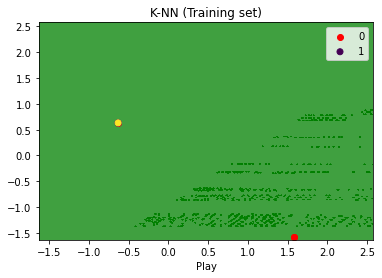

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Cuaca')
plt.xlabel('Play')
plt.legend()
plt.show()